# Testing on new data

In [35]:
from main import predict_one_hot, labels
import sklearn, pandas as pd, numpy as np, matplotlib.pyplot as plt

In [36]:
TEST_FILE_PATH = "track-a-test.csv"
preds = np.array(predict_one_hot(TEST_FILE_PATH))

## re-use testing code from training notebook

means test
anger       0.137931
fear        0.543103
joy         0.267241
sadness     0.301724
surprise    0.267241
dtype: float64 

diff
anger      -0.017628
fear        0.038905
joy        -0.023744
sadness     0.015472
surprise    0.035866
dtype: float64


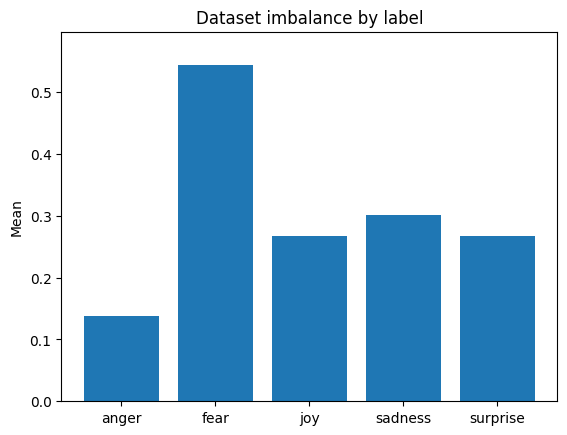

In [37]:
means_test = pd.read_csv(TEST_FILE_PATH)[labels].mean()
means_train = pd.read_csv("track-a.csv")[labels].mean()

print("means test")
print(means_test, "\n")

print("diff")
print(means_train - means_test)

fig, ax = plt.subplots()
ax.bar(means_test.index, means_test.values)
ax.set_ylabel("Mean")
ax.set_title("Dataset imbalance by label")
ax.set_xticks(range(len(means_test)))
ax.set_xticklabels(means_test.index)
ax.set_ylim(0, means_test.max() * 1.1)

plt.show()

In [38]:
ground_truth  = pd.read_csv(TEST_FILE_PATH)[labels].to_numpy()

# -- 1. standard per-label P/R/F1/support --------------------------------------
print(sklearn.metrics.classification_report(ground_truth, preds,
                                            target_names=labels,
                                            zero_division=np.nan
                                            )
      )

# -- 2. per-label accuracy (binary accuracy for each emotion) ------------------
print("\nPer-label accuracy:")
test_label_accuracy = (preds == ground_truth).mean(axis=0)
for lbl, acc in zip(labels, test_label_accuracy):
    print(f"  {lbl:<8}: {acc:.4f}") # align prints nicely

# -- 3. per-row accuracies -----------------------------------------------------
print("\nGlobal Accuracies")
test_row_accuracy = (preds == ground_truth).all(axis=1).mean()
test_field_accuracy = (preds == ground_truth).mean()
print(f"exactly correct rows        : {test_row_accuracy:.3f}")
print(f"accuracy across all fields  : {test_field_accuracy:.3f}")

              precision    recall  f1-score   support

       anger       1.00      0.19      0.32        16
        fear       0.66      0.78      0.72        63
         joy       0.77      0.55      0.64        31
     sadness       0.81      0.71      0.76        35
    surprise       0.72      0.42      0.53        31

   micro avg       0.72      0.61      0.66       176
   macro avg       0.79      0.53      0.59       176
weighted avg       0.75      0.61      0.64       176
 samples avg       0.71      0.64      0.58       176


Per-label accuracy:
  anger   : 0.8879
  fear    : 0.6638
  joy     : 0.8362
  sadness : 0.8621
  surprise: 0.8017

Global Accuracies
exactly correct rows        : 0.362
accuracy across all fields  : 0.810


In [39]:
train_label_accuracy = np.array([0.8664, 0.7004, 0.8159, 0.7581, 0.8051])
train_label_accuracy

array([0.8664, 0.7004, 0.8159, 0.7581, 0.8051])

In [40]:
test_label_accuracy

array([0.88793103, 0.6637931 , 0.8362069 , 0.86206897, 0.80172414])

In [41]:
(train_label_accuracy[[0,1,2,4]]-test_label_accuracy[[0,1,2,4]]).mean()

np.float64(-0.0004637931034482956)